## Gradient Tree Boosting

- 여러개의 결정트리를 묶어서 만듬
- RF 와 달리 오차를 보완하는 방식으로 순차적으로 생성
- 사전가지치기
- 얕은 Tree 사용(low memory)
- 얕은 Tree(weak learner) - 각 Tree는 데이터의 일부에 대해서만 예측 -> 트리 많으면 성능 좋아짐

* parameter
 - 사전가지치기, # of tree
 - learning rate : 오차를 얼마나 강하게 보정할지/ 크면 모델의 복잡도 증가

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
iris_data = datasets.load_iris()

X = iris_data.data
y = iris_data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=99)

In [7]:
gtb = GradientBoostingClassifier()

In [8]:
gtb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
gtb.score(X_train,y_train),gtb.score(X_test,y_test)

(1.0, 0.8888888888888888)

## 깊이 조절 


In [10]:
# 깊이 조절
gtb_depth = GradientBoostingClassifier(max_depth=2)
gtb_depth.fit(X_train,y_train)
gtb_depth.score(X_train,y_train),gtb_depth.score(X_test,y_test)

(1.0, 0.8666666666666667)

## 여러개의 모델

In [40]:
train_acc=[]
test_acc=[]

for i in range(5,201,5):
    dtb_n = GradientBoostingClassifier(n_estimators=i, random_state=i, max_depth=2,learning_rate=0.001)
    dtb_n.fit(X_train,y_train)
    train_acc.append(dtb_n.score(X_train,y_train))
    test_acc.append(dtb_n.score(X_test,y_test))

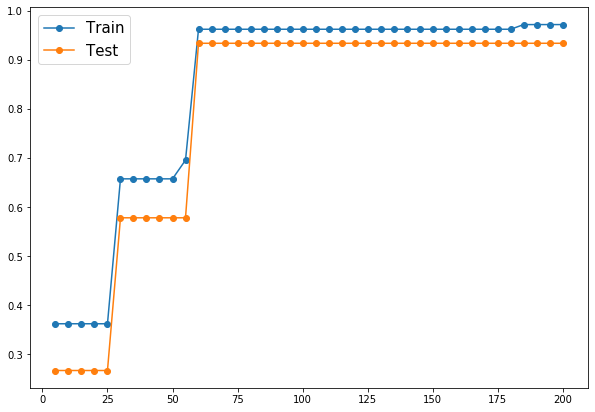

In [21]:
plt.figure(figsize=(10,7))
plt.plot(range(5,201,5),train_acc,label = 'Train', marker='o')
plt.plot(range(5,201,5),test_acc,label='Test',marker='o')
plt.legend(fontsize=15)

## Cancer dataset

In [43]:
bc_data = datasets.load_breast_cancer()
X = bc_data['data']
y = bc_data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11)

n_estimators = range(5,201,5)
r_state = range(505,701,5)
tr_acc=[]
te_acc=[]
for n,rs in zip(n_estimators,r_state):
    gtb = GradientBoostingClassifier(n_estimators=n,random_state=rs,max_depth=3)
    gtb.fit(X_train,y_train)
    
    tr_acc.append(gtb.score(X_train,y_train))
    te_acc.append(gtb.score(X_test,y_test))


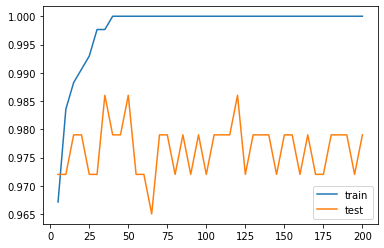

In [44]:
plt.plot(n_estimators,tr_acc,label = 'train')
plt.plot(n_estimators,te_acc,label = 'test')
plt.legend()

In [56]:
## train_test_split에 랜덤성을 추가하여 평균으로 계산을함
from statistics import mean
train_acc_mean=[]
test_acc_mean=[]
random_splits=range(1,200,37)
for r1 in random_splits:
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=r1)
    
    train_accuracy=[]
    test_accuracy=[]
    for n,rs in zip(n_estimators,r_state):
        gtb = GradientBoostingClassifier(n_estimators=n,random_state=rs,max_depth=3)
        gtb.fit(X_train,y_train)

        train_accuracy.append(gtb.score(X_train,y_train))
        test_accuracy.append(gtb.score(X_test,y_test))
        
    train_acc_mean.append(mean(train_accuracy))
    test_acc_mean.append(mean(test_accuracy))

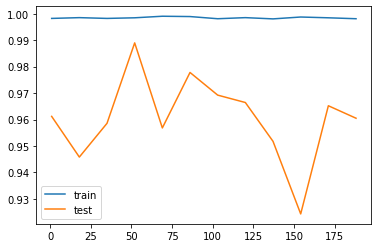

In [63]:
plt.plot(random_splits,train_acc_mean,label = 'train')
plt.plot(random_splits,test_acc_mean,label = 'test')
plt.legend()